<a href="https://colab.research.google.com/github/amina-messaoudi/Projet_2_Academic_Pulse/blob/main/Academic_Pulse_ETL_Analytics_Enriched.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

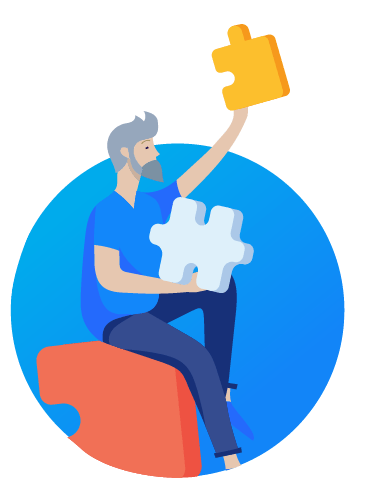

# <font color='blue'> **Projet 2 : Academic Pulse – ETL & Analytics on Student Feedback Data**

In [ ]:
import pandas as pd

df = pd.read_csv('dataset student feedback_csv.csv')
print(df.head())
print(df.info())

      Name            Q1         Q2       Q3\n       Q4\n         Q5
0  ABHINAV          Good       Good       Good       Good       Good
1  ADARSHA     Very Good  Very Good  Very Good  Excellent  Very Good
2   Additi  Satisfactory       Good       Good       Good       Good
3   Afira           Good       Good       Good       Good       Good
4    AKASH  Satisfactory       Good       Good  Very Good  Very Good
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    68 non-null     object
 1   Q1      68 non-null     object
 2   Q2      68 non-null     object
 3   Q3
     68 non-null     object
 4   Q4
     68 non-null     object
 5   Q5      68 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB
None


In [ ]:
# Vérification des valeurs nulles
print(df.isnull().sum())

Name    0
Q1      0
Q2      0
Q3\n    0
Q4\n    0
Q5      0
dtype: int64


Renommer les colonnes

In [ ]:
df.columns = ['Name', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

Standardiser les réponses par un mapping

In [ ]:
rating_map = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

for col in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']:
    df[col] = df[col].map(rating_map)


Calculer la moyenne des scores

In [ ]:
df['AverageScore'] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean(axis=1)
df['AverageScore']

,AverageScore
0,3.0
1,4.2
2,3.0
3,3.0
4,3.5
...,...
63,4.6
64,4.8
65,5.0
66,4.8


Top 5 évalués par score moyen :

In [ ]:
top_rated = df.groupby('Name')['AverageScore'].mean().sort_values(ascending=False).head()
top_rated

,AverageScore
Name,
Arun,5.0
Shreyaa,5.0
D LIKITHA,5.0
PRASHANTH,5.0
VAISHAK,5.0


Aspects (Q1–Q5) les moins bien notés :

In [ ]:
lowest_aspects = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean().sort_values()
lowest_aspects

,0
Q2,3.716667
Q1,3.965517
Q3,4.060606
Q5,4.116667
Q4,4.242424


Chargement en base de données **SQLite**

In [ ]:
import sqlite3
conn = sqlite3.connect("student_feedback.db")
df.to_sql("feedback", conn, if_exists="replace", index=False)

68

 Visualisation avec Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

aspect_means = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean()
sns.barplot(x=aspect_means.index, y=aspect_means.values)
plt.title("Note moyenne par aspect")
plt.ylabel("Score moyen")
plt.show()

**Interprétation des résultats**

Le graphique présente la **moyenne des notes** attribuées pour chaque question (Q1 à Q5) dans le questionnaire d’évaluation. Ces questions portent probablement sur des aspects pédagogiques comme la clarté, la maîtrise du sujet, l'interaction, etc.

## 🔄 Étape 1 : Renommage des colonnes
Pour éviter les problèmes causés par les sauts de ligne (`\n`) dans les noms de colonnes, nous renommons les champs Q3 et Q4.


In [ ]:
df.columns = ['Name', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

## 🔁 Étape 2 : Transformation des notes textuelles en scores numériques
Les valeurs textuelles telles que `Good`, `Very Good`, `Excellent` sont converties en notes numériques pour permettre les calculs statistiques.


In [ ]:

score_map = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

for col in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']:
    df[col] = df[col].map(score_map)


## ➗ Étape 3 : Calcul de la moyenne des notes par étudiant
On ajoute une colonne `AverageScore` qui contient la moyenne des scores attribués par chaque étudiant.


In [ ]:
df['AverageScore'] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean(axis=1)

## 📈 Étape 4 : Visualisation – Note moyenne par aspect
Nous affichons ci-dessous un graphique représentant la note moyenne de chaque aspect (Q1 à Q5).


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

aspect_means = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=aspect_means.index, y=aspect_means.values)
plt.title("📊 Note moyenne par aspect", fontsize=14)
plt.ylabel("Score moyen")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 🧠 Interprétation des résultats

- 🔝 **Q4** est l'aspect le mieux noté (~4.25), ce qui montre une forte satisfaction.
- ⚠️ **Q2** est en retrait (~3.7), point d'amélioration possible.
- ✅ L'ensemble des aspects a une moyenne supérieure à 3.5, indiquant une satisfaction globale satisfaisante.


## 🗃️ Étape 5 : Chargement dans une base SQLite
Pour boucler l'étape ETL, nous stockons les données nettoyées dans une base de données relationnelle (SQLite).


In [ ]:

import sqlite3

conn = sqlite3.connect("student_feedback.db")
df.to_sql("feedback", conn, if_exists="replace", index=False)
conn.close()
